<a href="https://colab.research.google.com/github/jscienciadados/decision-tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree in Python

Entropy and Gini Index

Pacotes

In [1]:
!pip install pydot

In [2]:
!pip install graphviz

In [3]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
import graphviz

In [4]:
# Criando o dataset
instancias = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'}
]

In [5]:
# Transformando o Dicionário em Dataframe
df = pd.DataFrame(instancias)

In [6]:
df

,Melhor Amigo,Especie
0,False,Cachorro
1,True,Cachorro
2,True,Gato
3,True,Gato
4,False,Gato
5,True,Gato
6,True,Gato
7,False,Cachorro
8,True,Gato
9,False,Cachorro


In [7]:
# Preparando os dados de treino e de teste
X_train = [[1] if a else [0] for a in df['Melhor Amigo']]
y_train = [1 if d == 'Cachorro' else 0 for d in df['Especie']]
labels = ['Melhor Amigo']


In [8]:
print(X_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [9]:
print(y_train)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


## Construindo o Modelo

In [10]:
modelo_v1 = DecisionTreeClassifier(max_depth = None,
                                   max_features = None,
                                   criterion = 'entropy',
                                   min_samples_leaf = 1,
                                   min_samples_split = 2)

In [11]:
# Apresentando os dados ao Classificador
modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'arq/tree_modelo_v1.dot'


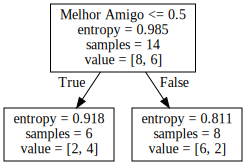

In [13]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
# Salvando no formato png
!dot -Tpng tree_modelo_v1.dot -o tree_modelo_v1.png

Error: dot: can't open tree_modelo_v1.dot


In [15]:
# Criando o modelo versão 2 com o indice gini
modelo_v2 = DecisionTreeClassifier(max_depth = None,
                                   max_features = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2)


In [16]:
# Apresentando os dados ao Classificador
modelo_v2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo1 = 'arq/tree_modelo_v2.dot'


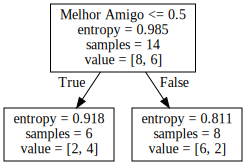

In [18]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v2, out_file = arquivo1, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)